In [1]:
#!pip install lazypredict

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
df1=pd.read_excel('/content/bangalore_cars.xlsx').assign(City='Bangalore')
df2=pd.read_excel('/content/chennai_cars.xlsx').assign(City='Chennai')
df3=pd.read_excel('/content/delhi_cars.xlsx').assign(City='Delhi')
df4=pd.read_excel('/content/hyderabad_cars.xlsx').assign(City='Hyderabad')
df5=pd.read_excel('/content/jaipur_cars.xlsx').assign(City='Jaipur')
df6=pd.read_excel('/content/kolkata_cars.xlsx').assign(City='Kolkata')

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)

(1481, 6)
(1419, 6)
(1485, 6)
(1483, 6)
(1120, 6)
(1381, 6)


In [5]:
df=pd.concat([df1,df2,df3,df4,df5,df6])

In [6]:
df1.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,City
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore


In [7]:
df1.iloc[0,0]

"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 3, 'owner': '3rd Owner', 'oem': 'Maruti', 'model': 'Maruti Celerio', 'modelYear': 2015, 'centralVariantId': 3979, 'variantName': 'VXI', 'price': '₹ 4 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [8]:
df1.iloc[0,1]

"{'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2015', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Petrol', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '1,20,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'RTO', 'value': 'KA51', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'}, {'key': 'Ownership', 'value': 'Third Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '998 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key': 'Transmission', '

In [9]:
df1.iloc[0,2]

"{'heading': 'Features', 'top': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Adjustable Head Lights'}, {'value': 'Manually Adjustable Exterior Rear View Mirror'}, {'value': 'Centeral Locking'}, {'value': 'Child Safety Locks'}], 'data': [{'heading': 'Comfort & Convenience', 'subHeading': 'Comfort', 'list': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Power Windows Rear'}, {'value': 'Remote Trunk Opener'}, {'value': 'Remote Fuel Lid Opener'}, {'value': 'Low Fuel Warning Light'}, {'value': 'Accessory Power Outlet'}, {'value': 'Vanity Mirror'}, {'value': 'Rear Seat Headrest'}, {'value': 'Cup Holders Front'}]}, {'heading': 'Interior', 'subHeading': 'Interior', 'list': [{'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Digital Odometer'}, {'value': 'Electronic Multi Tripmeter'}, {'value': 'Fabric Upholstery'}, {'value': 'Glove Compartment'}, {'value': 'Digital Clock'}]},

In [10]:
df1.iloc[0,3]

"{'heading': 'Specifications', 'top': [{'key': 'Mileage', 'value': '23.1 kmpl'}, {'key': 'Engine', 'value': '998 CC'}, {'key': 'Max Power', 'value': '67.04bhp'}, {'key': 'Torque', 'value': '90Nm'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'White'}, {'key': 'Engine Type', 'value': 'K10B Engine'}, {'key': 'Displacement', 'value': '998'}, {'key': 'Max Power', 'value': '67.04bhp@6000rpm'}, {'key': 'Max Torque', 'value': '90Nm@3500rpm'}, {'key': 'No of Cylinder', 'value': 3}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Value Configuration', 'value': 'DOHC'}, {'key': 'Fuel Suppy System', 'value': 'MPFi'}, {'key': 'BoreX Stroke', 'value': '73 X 82 mm'}, {'key': 'Compression Ratio', 'value': '11.0:1'}, {'key': 'Turbo Charger', 'value': 'No'}, {'key': 'Super Charger', 'value': 'No'}]}, {'heading': 'Dimensions & Capacity', 'subHeading': 'Dimensions', 'list': [{'key': 'Length', 'value': '37

In [11]:
df['new_car_detail']=df['new_car_detail'].apply(eval)
df['new_car_overview']=df['new_car_overview'].apply(eval)
df['new_car_specs']=df['new_car_specs'].apply(eval)

In [12]:
# Function to extract a feature from the  dictionary
def fuel(row):
    return row['ft']
# Create a new column 'Fuel' and apply the function
df['Fuel'] = df['new_car_detail'].apply(fuel)

In [13]:
# Function to extract a feature from the dictionary
def distance(row):
    return row['km']
# Create a new column 'Distance' and apply the function
df['Distance'] = df['new_car_detail'].apply(distance)

In [14]:
# Function to extract a feature from the dictionary
def gear(row):
    return row['transmission']
# Create a new column 'Transmission' and apply the function
df['Transmission'] = df['new_car_detail'].apply(gear)

In [15]:
# Function to extract a feature from the dictionary
def year(row):
    return row['modelYear']
# Create a new column 'Model_year' and apply the function
df['Model_year'] = df['new_car_detail'].apply(year)

In [16]:
# Function to extract a feature from the dictionary
def brand(row):
    return row['oem']
# Create a new column 'Brand' and apply the function
df['Brand'] = df['new_car_detail'].apply(brand)

In [17]:
# Function to extract a feature from the dictionary
def mileage(row):
    return next((item['value'] for item in row['top'] if item['key'] == 'Mileage'),None)
# Create a new column 'Mileage' and apply the function
df['Mileage'] = df['new_car_specs'].apply(mileage)

In [18]:
# Function to extract a feature from the dictionary
def owner(row):
    return row['ownerNo']
# Create a new column 'Owner_No' and apply the function
df['Owner_No'] = df['new_car_detail'].apply(owner)

In [19]:
# Function to extract a feature from the dictionary
def seats(row):
  return next((item['value'].split()[0] for item in row['top'] if item['key'] == 'Seats'), None)
# Create a new column 'Seats' and apply the function
df['Seats']=df['new_car_overview'].apply(seats)

In [20]:
# Function to extract a feature from the dictionary
def engine(row):
  return next((item['value'] for item in row['top'] if item['key'] == 'Engine Displacement'), None)
# Create a new column 'Engine' and apply the function
df['Engine']=df['new_car_overview'].apply(engine)

In [21]:
# Function to extract a feature from the dictionary
def price(row):
    return row['price']
# Create a new column 'Sell_price' and apply the function
df['Sell_price'] = df['new_car_detail'].apply(price)

In [22]:
df=df.reset_index(drop=True)

In [23]:
df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,City,Fuel,Distance,Transmission,Model_year,Brand,Mileage,Owner_No,Seats,Engine,Sell_price
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore,Petrol,"1,20,000",Manual,2015,Maruti,23.1 kmpl,3,5,998 cc,₹ 4 Lakh
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore,Petrol,"32,706",Manual,2018,Ford,17 kmpl,2,5,1497 cc,₹ 8.11 Lakh
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore,Petrol,"11,949",Manual,2018,Tata,23.84 kmpl,1,5,1199 cc,₹ 5.85 Lakh
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore,Petrol,"17,794",Manual,2014,Hyundai,19.1 kmpl,1,5,1197 cc,₹ 4.62 Lakh
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore,Diesel,"60,000",Manual,2015,Maruti,23.65 kmpl,1,5,1248 cc,₹ 7.90 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata,Petrol,"10,000",Manual,2022,Maruti,25.24 kmpl,1,5,998 cc,₹ 5.10 Lakh
8365,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata,Petrol,"1,20,000",Manual,2014,Maruti,22.74 kmpl,1,5,796 cc,₹ 1.80 Lakh
8366,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata,Petrol,"50,000",Automatic,2011,Mercedes-Benz,11.74 kmpl,3,5,1796 cc,₹ 5.50 Lakh
8367,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata,Petrol,"40,000",Manual,2012,Maruti,18.5 kmpl,1,5,1197 cc,₹ 1.40 Lakh


In [24]:
df.drop(columns=['new_car_detail','new_car_overview','new_car_feature','new_car_specs','car_links'],inplace=True)

In [25]:
df

,City,Fuel,Distance,Transmission,Model_year,Brand,Mileage,Owner_No,Seats,Engine,Sell_price
0,Bangalore,Petrol,"1,20,000",Manual,2015,Maruti,23.1 kmpl,3,5,998 cc,₹ 4 Lakh
1,Bangalore,Petrol,"32,706",Manual,2018,Ford,17 kmpl,2,5,1497 cc,₹ 8.11 Lakh
2,Bangalore,Petrol,"11,949",Manual,2018,Tata,23.84 kmpl,1,5,1199 cc,₹ 5.85 Lakh
3,Bangalore,Petrol,"17,794",Manual,2014,Hyundai,19.1 kmpl,1,5,1197 cc,₹ 4.62 Lakh
4,Bangalore,Diesel,"60,000",Manual,2015,Maruti,23.65 kmpl,1,5,1248 cc,₹ 7.90 Lakh
...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,Petrol,"10,000",Manual,2022,Maruti,25.24 kmpl,1,5,998 cc,₹ 5.10 Lakh
8365,Kolkata,Petrol,"1,20,000",Manual,2014,Maruti,22.74 kmpl,1,5,796 cc,₹ 1.80 Lakh
8366,Kolkata,Petrol,"50,000",Automatic,2011,Mercedes-Benz,11.74 kmpl,3,5,1796 cc,₹ 5.50 Lakh
8367,Kolkata,Petrol,"40,000",Manual,2012,Maruti,18.5 kmpl,1,5,1197 cc,₹ 1.40 Lakh


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          8369 non-null   object
 1   Fuel          8369 non-null   object
 2   Distance      8369 non-null   object
 3   Transmission  8369 non-null   object
 4   Model_year    8369 non-null   int64 
 5   Brand         8369 non-null   object
 6   Mileage       8082 non-null   object
 7   Owner_No      8369 non-null   int64 
 8   Seats         8363 non-null   object
 9   Engine        8365 non-null   object
 10  Sell_price    8369 non-null   object
dtypes: int64(2), object(9)
memory usage: 719.3+ KB


In [27]:
df.isna().sum()

City              0
Fuel              0
Distance          0
Transmission      0
Model_year        0
Brand             0
Mileage         287
Owner_No          0
Seats             6
Engine            4
Sell_price        0
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
#Convert into numerical columns
df['Distance']=df['Distance'].str.replace(',','').astype('int')
df['Seats']=df['Seats'].astype('int')
df['Engine']=df['Engine'].str.replace(' cc','').astype('int')
df['Mileage'] = df['Mileage'].str.extract('([\d.]+)').astype(float)

In [30]:
df['Sell_price']=df['Sell_price'].str.strip()
df['Sell_price']=df['Sell_price'].str.replace('₹ ','')
df['Sell_price']=df['Sell_price'].str.replace(',','')
df['Sell_price'] = df['Sell_price'].replace({' Lakh':'*1e5',' Crore':'*1e7'}, regex=True).map(pd.eval).astype('float')

In [31]:
#Remove outliers
col=['Distance','Engine','Mileage','Sell_price']
for c in col:
  q1=df[c].quantile(0.25)
  q3=df[c].quantile(0.75)
  IQR=q3-q1
  LC=q1-(IQR*1.5)
  UC=q3+(IQR*1.5)
  df=df[(df[c]>=LC) & (df[c]<=UC)]

<Axes: xlabel='City', ylabel='Sell_price'>

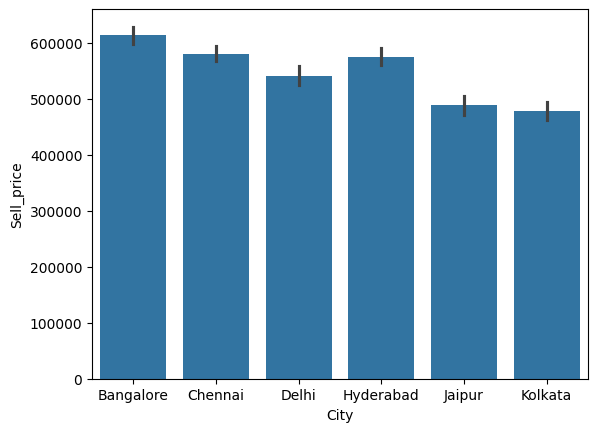

In [32]:
sns.barplot(x=df['City'],y=df['Sell_price'])

<Axes: xlabel='Fuel', ylabel='Sell_price'>

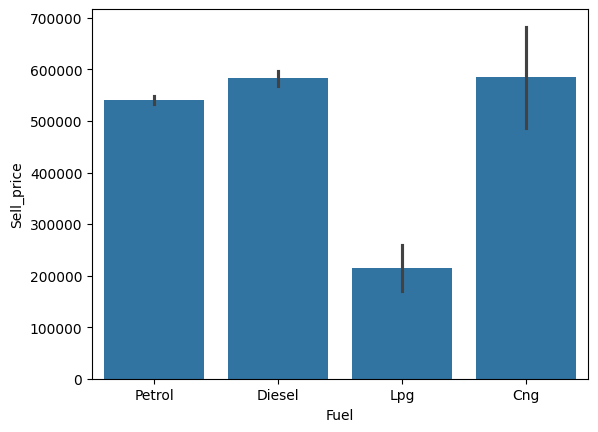

In [33]:
sns.barplot(x=df['Fuel'],y=df['Sell_price'])

<Axes: xlabel='Distance', ylabel='Sell_price'>

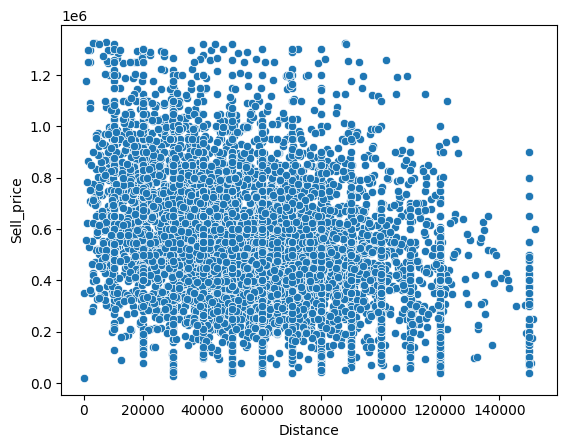

In [34]:
sns.scatterplot(x=df['Distance'],y=df['Sell_price'])

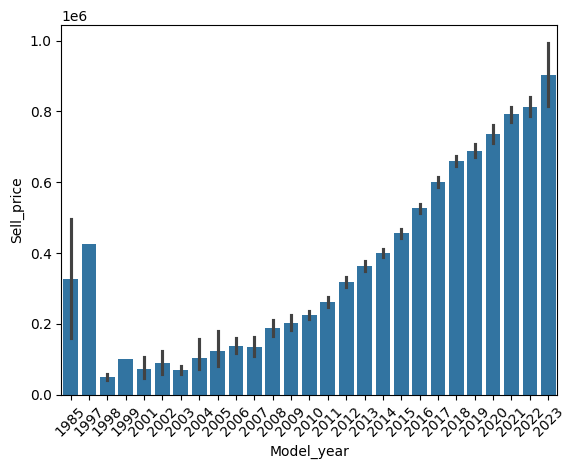

In [35]:
sns.barplot(x=df['Model_year'],y=df['Sell_price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Mileage', ylabel='Sell_price'>

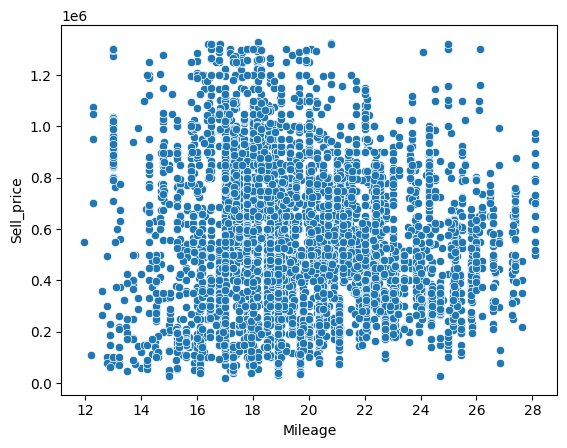

In [36]:
sns.scatterplot(x=df['Mileage'],y=df['Sell_price'])

<Axes: xlabel='Engine', ylabel='Sell_price'>

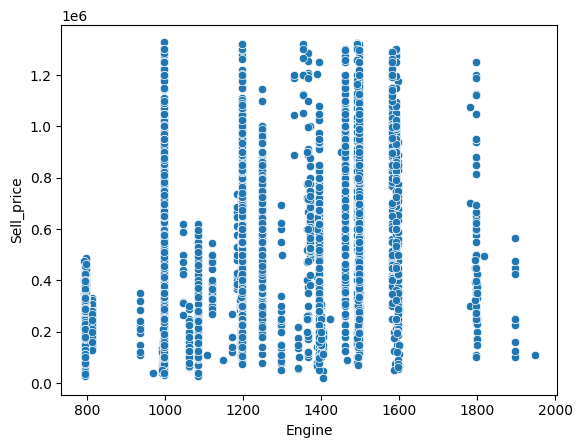

In [37]:
sns.scatterplot(x=df['Engine'],y=df['Sell_price'])

<Axes: xlabel='Owner_No', ylabel='Sell_price'>

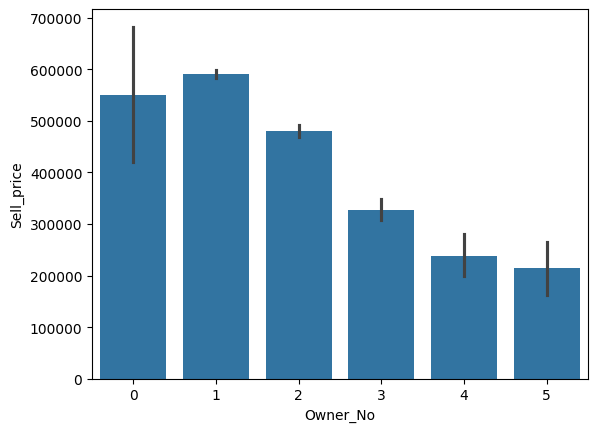

In [38]:
sns.barplot(x=df['Owner_No'],y=df['Sell_price'])

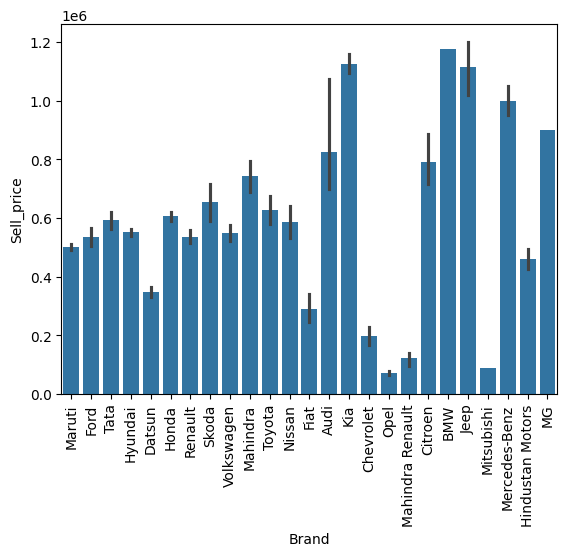

In [39]:
sns.barplot(x=df['Brand'],y=df['Sell_price'])
plt.xticks(rotation=90)
plt.show()

In [40]:
df

,City,Fuel,Distance,Transmission,Model_year,Brand,Mileage,Owner_No,Seats,Engine,Sell_price
0,Bangalore,Petrol,120000,Manual,2015,Maruti,23.10,3,5,998,400000.00
1,Bangalore,Petrol,32706,Manual,2018,Ford,17.00,2,5,1497,811000.00
2,Bangalore,Petrol,11949,Manual,2018,Tata,23.84,1,5,1199,585000.00
3,Bangalore,Petrol,17794,Manual,2014,Hyundai,19.10,1,5,1197,462000.00
4,Bangalore,Diesel,60000,Manual,2015,Maruti,23.65,1,5,1248,790000.00
...,...,...,...,...,...,...,...,...,...,...,...
8362,Kolkata,Petrol,70000,Manual,2015,Volkswagen,16.20,1,5,1199,360000.00
8364,Kolkata,Petrol,10000,Manual,2022,Maruti,25.24,1,5,998,510000.00
8365,Kolkata,Petrol,120000,Manual,2014,Maruti,22.74,1,5,796,180000.00
8367,Kolkata,Petrol,40000,Manual,2012,Maruti,18.50,1,5,1197,140000.00


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 8368
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          6302 non-null   object 
 1   Fuel          6302 non-null   object 
 2   Distance      6302 non-null   int64  
 3   Transmission  6302 non-null   object 
 4   Model_year    6302 non-null   int64  
 5   Brand         6302 non-null   object 
 6   Mileage       6302 non-null   float64
 7   Owner_No      6302 non-null   int64  
 8   Seats         6302 non-null   int64  
 9   Engine        6302 non-null   int64  
 10  Sell_price    6302 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 590.8+ KB


In [42]:
df.describe()

,Distance,Model_year,Mileage,Owner_No,Seats,Engine,Sell_price
count,6302.00,6302.00,6302.00,6302.00,6302.00,6302.00,6302.00
mean,58019.52,2016.27,20.07,1.36,5.08,1240.01,548863.09
std,31898.67,3.76,2.91,0.64,0.40,214.22,260215.48
min,0.00,1985.00,11.96,0.00,4.00,793.00,20161.00
25%,33000.00,2014.00,18.00,1.00,5.00,1196.00,350000.00
50%,55000.00,2017.00,20.00,1.00,5.00,1197.00,522000.00
75%,80000.00,2019.00,22.05,2.00,5.00,1461.00,718750.00
max,152000.00,2023.00,28.09,5.00,10.00,1948.00,1329000.00


In [43]:
le=LabelEncoder()

In [44]:
df['City']=le.fit_transform(df['City'])
df['Fuel']=le.fit_transform(df['Fuel'])
df['Transmission']=le.fit_transform(df['Transmission'])
df['Brand']=le.fit_transform(df['Brand'])

In [45]:
df

,City,Fuel,Distance,Transmission,Model_year,Brand,Mileage,Owner_No,Seats,Engine,Sell_price
0,0,3,120000,1,2015,15,23.10,3,5,998,400000.00
1,0,3,32706,1,2018,6,17.00,2,5,1497,811000.00
2,0,3,11949,1,2018,22,23.84,1,5,1199,585000.00
3,0,3,17794,1,2014,9,19.10,1,5,1197,462000.00
4,0,1,60000,1,2015,15,23.65,1,5,1248,790000.00
...,...,...,...,...,...,...,...,...,...,...,...
8362,5,3,70000,1,2015,24,16.20,1,5,1199,360000.00
8364,5,3,10000,1,2022,15,25.24,1,5,998,510000.00
8365,5,3,120000,1,2014,15,22.74,1,5,796,180000.00
8367,5,3,40000,1,2012,15,18.50,1,5,1197,140000.00


In [46]:
X=df.drop('Sell_price',axis=1)
y=df['Sell_price']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [48]:
reg=LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)
models, predictions = reg.fit(x_train, x_test,y_train, y_test)
print(models)

 79%|███████▊  | 33/42 [00:20<00:04,  2.17it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:25<00:00,  1.66it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 5041, number of used features: 10
[LightGBM] [Info] Start training from score 547348.328110
                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
XGBRegressor                                 0.91       0.91    78059.13   
LGBMRegressor                                0.90       0.90    80529.75   
HistGradientBoostingRegressor                0.90       0.90    81963.73   
RandomForestRegressor                        0.89       0.89    85049.87   
BaggingRegressor                             0.89       0.89    85425.34   
ExtraTreesRegressor                          0.88       0.8

In [49]:
mod=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
for m in mod:
  print(m)
  model=m
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  mse=mean_squared_error(y_pred,y_test)
  rmse=np.sqrt(mse)
  r2=r2_score(y_pred,y_test)
  print("Mean Squared Error (MSE)     :", mse)
  print("Root Mean Square Error (RMSE):", rmse)
  print("R2 Score                     :",r2)

LinearRegression()
Mean Squared Error (MSE)     : 18683006096.390682
Root Mean Square Error (RMSE): 136685.79332319318
R2 Score                     : 0.5908029138644408
DecisionTreeRegressor()
Mean Squared Error (MSE)     : 13741548378.11481
Root Mean Square Error (RMSE): 117224.35061929245
R2 Score                     : 0.7926773224539788
RandomForestRegressor()
Mean Squared Error (MSE)     : 7345978445.997672
Root Mean Square Error (RMSE): 85708.68360905838
R2 Score                     : 0.8702017227962033


In [50]:
# Create a Random Forest Regressort
rf_regressor = RandomForestRegressor()

# Define the hyperparameter grid to search through
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_pred,y_test)
print("Mean Squared Error on Test Set: {:.2f}".format(mse))
print("Root Mean Squared Error on Test Set: {:.2f}".format(rmse))
print("R2 SCore:",r2)

Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}
Mean Squared Error on Test Set: 7412299733.74
Root Mean Squared Error on Test Set: 86094.71
R2 SCore: 0.8689462927010054
